In [23]:
import pandas as pd
from datetime import datetime

In [25]:
# concat all df into one
df_list = []
for i in range(4):
    df_list.append(pd.read_csv(f"./data/{i+1}.csv"))
df = pd.concat(df_list)

In [26]:
def convert_hour(time_str):
    time_obj = datetime.strptime(time_str, '%I:%M:%S %p')
    hour_24 = int(time_obj.strftime('%H'))
    return hour_24
    
df['Arrival Hour'] = df['Arrival Time'].apply(convert_hour)

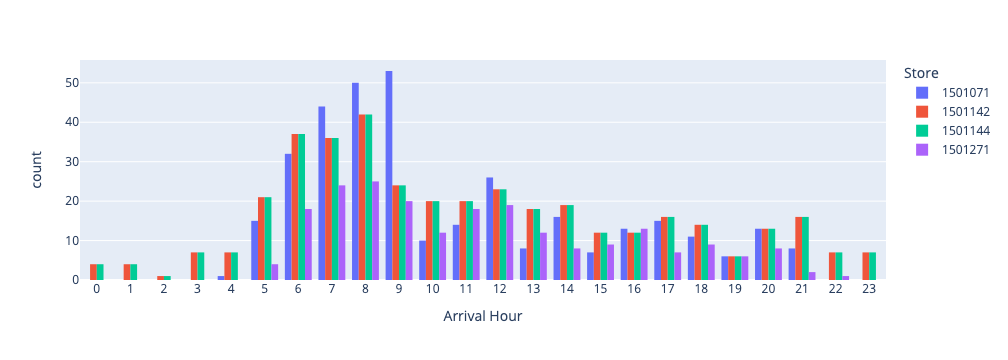

In [28]:
# draw histograph on arrival hour
import plotly.express as px
fig = px.histogram(df, x='Arrival Hour', color='Store', barmode='group')
fig.update_layout(xaxis={'dtick': 'M1'})
# Show the figure 
fig.show()

**Histogram of _# of order_ over time**

1. It is evident that store 1071 (blue) has the highest overall business volume (most orders), while store 1271 records the fewest orders.
2. The other two stores (red and green) exhibit very similar patterns.
3. The busiest period for all stores is between 5 am and 9 am. Additionally, both red and green stores receive orders early (before 5 am) and late (after 10 pm).

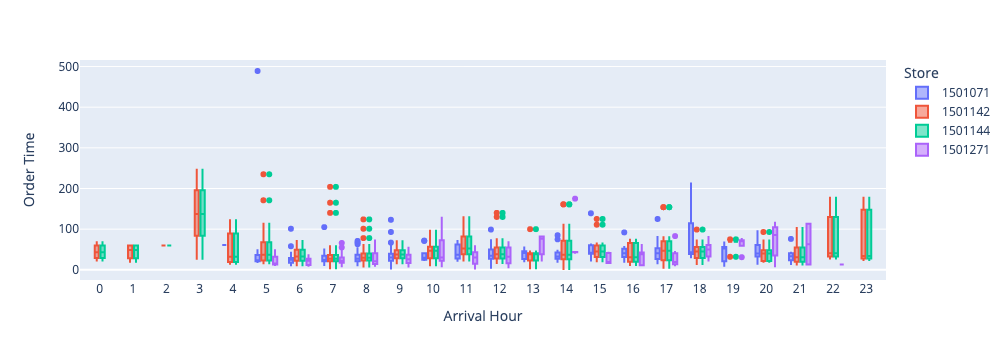

In [17]:
# box graph on order time overtime
fig = px.box(df, x='Arrival Hour', y='Order Time', color='Store')
fig.update_layout(xaxis={'dtick': 'M1'})
fig.show()

**Box graph on _order time_ overtime**

1. Box graph is a valuable tool for identifying anomalous orders with extended order times. For instance, in the blue store after 5 am, there is an order that took 489 seconds. Similar anomalies can be observed for the green and red stores.
2. The box graph also highlights the variance in service times. A shorter box represents more stable service, while a longer box indicates a larger variance and less consistent service. For example, the blue store has a long box after 6 pm, and both the green and red stores exhibit longer boxes around 3 am, 10 pm, and 11 pm. This suggests that several customers experienced significantly longer order times than the average during these periods. 
3. Furthermore, the box plot allows for a comparison of average order times across different time slots. For instance, both the blue and red stores have considerably longer average order times (137 seconds) at specific points, which is nearly 3.6 times higher than other time slots.

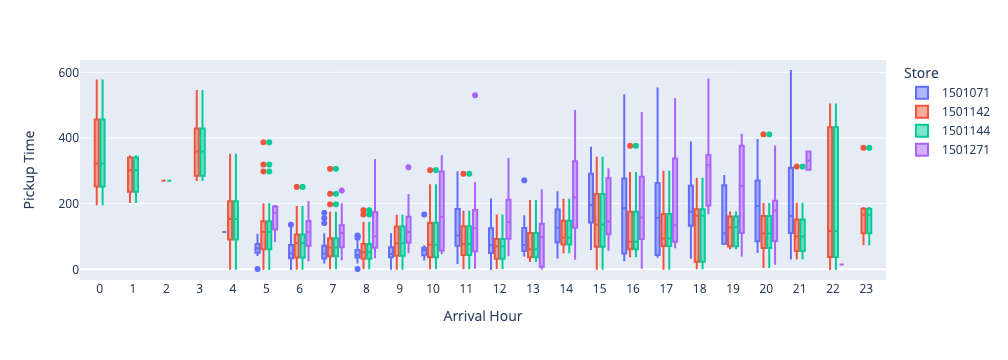

In [29]:
# box graph on pickup time overtime
fig = px.box(df, x='Arrival Hour', y='Pickup Time', color='Store')
fig.update_layout(xaxis={'dtick': 'M1'})
fig.show()

**Box graph on _pickup time_ overtime**

1. From the box plot above, we can observe several long boxes for the green, red, and purple stores. For example, the green and red stores have long boxes at 0 am, 3 am, 3 pm, 6 pm, and 10 pm. Notably, at 10 pm, a few orders took significantly longer (over 300 seconds) to pick up. For the purple store, long boxes are visible throughout most of the day, indicating unstable service at this location. When combined with the histogram that reveals the purple store has the fewest orders, it appears that this store has considerable room for improving service stability.

2. Regarding the blue store, it generally provides a stable service (compact boxes) for pickups before 4 pm. After 4 pm, despite having fewer orders compared to the busy morning hours, there is a much larger variance in pickup times. One possible explanation for this is that preparing dinner takes longer due to the variation in orders.

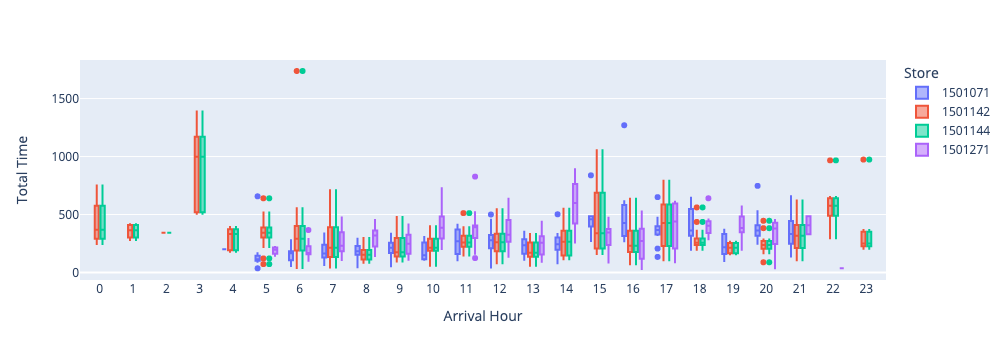

In [19]:
# box graph on pickup time overtime
fig = px.box(df, x='Arrival Hour', y='Total Time', color='Store')
fig.update_layout(xaxis={'dtick': 'M1'})
fig.show()

In [20]:
df['Drive Time'] = df['Total Time'] - df['Order Time'] - df['Pickup Time']

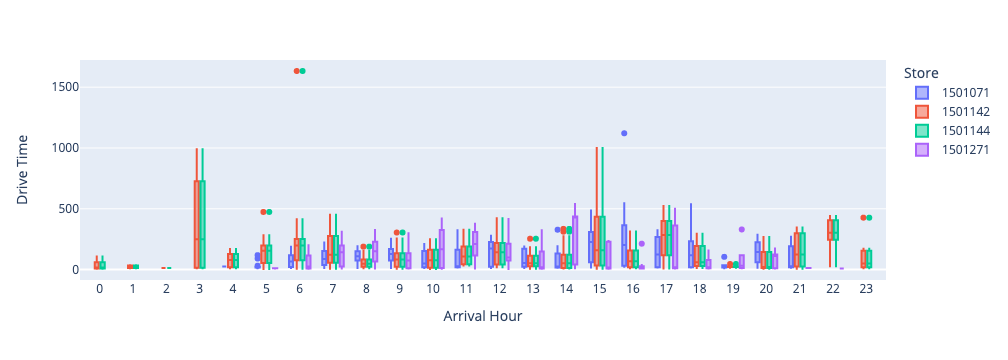

In [21]:
# box graph on drive time overtime
fig = px.box(df, x='Arrival Hour', y='Drive Time', color='Store')
fig.update_layout(xaxis={'dtick': 'M1'})
fig.show()

**Draw box graph on _drive time & total time_ overtime**

1. From the box plot above, we can observe several long boxes for the green, red, and purple stores. For instance, for the green and red stores, we see long boxes at 0 am, 3 am, 3 pm, 5 pm, and 10 pm. Notably, after 10 pm, a few orders took significantly longer (over 300 seconds) to pick up. For the purple store, long boxes appear throughout most of the day, indicating unstable service at this location. When combined with the order histogram, which shows that the purple store has the fewest orders, it seems that this store has substantial room for improvement in service stability.

2. For the blue store, in general, it provides a relatively stable service (compact boxes) for pickups before 4 pm. Between 4 pm and 6pm, although there are fewer orders compared to the busy morning hours, there is a larger variance in drive time. One possible explanation is that customers volumn is higher than other time slots.

==========================================
**Summary of findings**
==========================================

1. Store 1071 has the highest overall business volume, while store 1271 has the fewest orders. 
2. Stores 1081 and 1101 exhibit similar patterns.
3. The busiest period for all stores is between 5 am and 9 am. Additionally, red and green stores receive orders early (before 5 am) and late (after 10 pm).
4. Anomalies in order times are visible in the box graph, such as an order that took 489 seconds in the blue store after 5 am. These anomalies are also observed in green and red stores.
5. Variance in service times can be analyzed using the box graph. Longer boxes indicate a larger variance and less consistent service, as observed for the blue store after 5 pm and both green and red stores around 3 am, 3pm, 5pm, 10 pm.
6. The box graph allows for comparison of average order times across different time slots, revealing that the blue and red stores have considerably longer average order times (137 seconds) at specific points.
7. The purple store has fewest orders but unstable service throughout most of the day, indicating considerable room for improvement in service stability.
8. The blue store provides relatively stable service before 4 pm but has a larger variance in pickup times betwee 4pm and 6pm, possibly due to variations in dinner orders.


==========================================
**Futher product frontend design**
==========================================
1. Executive Dashboard: Create an executive dashboard that provides a high-level overview of the key performance indicators (KPIs) for each store, such as the number of orders, average order times, and customer satisfaction scores. This allows managers to quickly assess the performance of each store at a glance.

2. Comparative Analysis: Use visualizations that allow for easy comparison between stores. This can help managers identify best practices, areas for improvement, and opportunities for learning from one another. Bar charts, line charts, or heatmaps can be effective for comparative analysis.

3. Detailed Data Visualization: Use interactive charts and graphs to present the data, allowing users to explore the information in more depth. I'm familiar with ibraries like Plotly, D3.js for creating interactive visualizations above as shown. This can help managers identify best practices, areas for improvement, and opportunities for learning from one another

4. Anomalies and health level: Highlight anomalies and restaurant healthy level based on the data. This can help managers pinpoint issues that require attention and further investigation. Here, we need to talk with the users to build the baseline or the rules of every metrics.